load dataset: 8420it [00:14, 577.08it/s] 


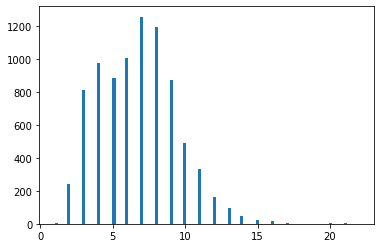

In [6]:
import json
import matplotlib.pyplot as plt
from transformers import AlbertTokenizer
from tqdm import tqdm

tokenizer = AlbertTokenizer.from_pretrained('/data1/zkh/deepLearning/DST/DiCoS_new/pretrained_models/albert_large')

with open('/data1/zkh/deepLearning/DST/DiCoS_new/data/MultiWoZ/2.2/processed/train_dials.json', 'r', encoding='utf-8') as in_:
    list_dialogue = json.load(in_)


list_turnNum = []
list_tokenNum_turn = []
list_tokenNum_dialogue = []
for dialogueIdx, dict_dialogue in tqdm(enumerate(list_dialogue), 'load dataset'):
    '''
        {
            "dialogue_idx": "MUL0012.json",
            "domains": [],
            "dialogue": []
        }
                
    '''
    list_turnNum.append(len(dict_dialogue['dialogue']))

    tokenNum_dialogue = 0
    for dialogueTurn in dict_dialogue['dialogue']: # 准备要用的轮次
        '''
            {
                "system_transcript": "",
                "turn_idx": 0,
                "belief_state": [],
                "turn_label": [],
                "transcript": "i need information on a hotel that include -s free parking please .",
                "system_acts": [],
                "domain": "hotel"
            }
        '''
        sentences = dialogueTurn['system_transcript'] + ';' + dialogueTurn['transcript']
        lenTurn = len(tokenizer.tokenize(sentences))
        tokenNum_dialogue += lenTurn
        list_tokenNum_turn.append(lenTurn)
    
    list_tokenNum_dialogue.append(tokenNum_dialogue)



plt.hist(list_turnNum,100)
plt.show()




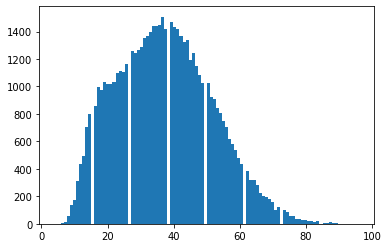

In [7]:

plt.hist(list_tokenNum_turn,100)
plt.show()



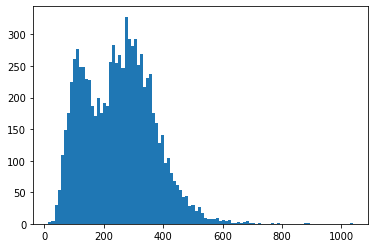

In [8]:
plt.hist(list_tokenNum_dialogue, 100)
plt.show()